<a href="https://colab.research.google.com/github/dthatprince/Global-Terrorism-Data-Analysis-and-Prediction/blob/main/Colab_Prediction_of_global_terrorist_attacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Questions**
1. Which region, country, city have the highest terrorist attack?
2. Which is the most common target type, attack type and weapon type and group?
3. Which group have the highest rate of successful attacks?
4. Which attack type, weapon type or target type is most associated with success.

---
#**GUIDELINES**
---
1. Before adding in any code or implementation, kindly go through the whole document first to understand the general thought process.


2. When making code contributions, please ensure you do it in a new section or code box and endeavour to comment and document your code as much as you can. , Also, include your name at the start of every submission.


3. If you only notice a minor error in other's contribution, you can correct it, indicating what you've done or just leave a comment.

***Feel free to add more necessary guidelines as you deem fit***

![background.png](https://www.vifindia.org/sites/default/files/terrorism-gold-text-black-background-d-rendered-royalty-free-stock-picture-image-can-be-used-online-website-banner-87918799.jpg)

---
# **Analysis and Predictive Modelling of global terrorism attack success or failure**
---
> The primary objective of this project is to anlayze global terrorism trends draw insightful conlusions on what determines the success or failure of a terrorist attack and build a predictive model that will predict whether a terrorist attack will be successful or not. This model will utilize historical data on previous attacks, including factors such as 

>>```
year, month, day, country, 
city, region, attack type, 
weapon type, target type, 
whether a kid was held hostage, group name, 
and if the attack was single or multiple.
```
>>
to identify patterns and trends.



In [247]:
#@title Library Imports
import chardet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.impute import SimpleImputer

warnings.filterwarnings("ignore")
pd.set_option('display.max_info_rows', 1000)
pd.set_option('display.max_info_columns', 1000)
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
plt.style.use('ggplot')
sns.set_context('notebook')

In [248]:
#@title Download Dataset
# download dataset
!gdown 1-9nJNjjY6M9HZh5tALNXjz_2c45vGmZo

Downloading...
From: https://drive.google.com/uc?id=1-9nJNjjY6M9HZh5tALNXjz_2c45vGmZo
To: /content/globalterrorismdb_0718dist.csv
100% 163M/163M [00:01<00:00, 150MB/s]


In [249]:
#@title Detect file Encoding
# detect file encoding
with open('globalterrorismdb_0718dist.csv', 'rb') as raw:
  result=chardet.detect(raw.read(90000))
print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [250]:
#@title Load and Display Data
terrorism_df= pd.read_csv('globalterrorismdb_0718dist.csv', encoding="ISO-8859-1")
terrorism_df.head(2)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN


---

## **Data Cleaning**

---



In [251]:
# print dataset number of rows and columns
terrorism_df.shape

(181691, 135)

> There are 135 features and 181 691 observations in the dataset. 
---
#### ***Subset the data for our variable of interest***

To further the aim of our project objective, we will subset the original dataset for only the features we consider relevant to our aim based on information gained from the dataset description.

In [252]:
project_df = terrorism_df[['iyear', 'imonth', 'iday', 
                           'country', 'country_txt',
                           'region', 'region_txt',
                           'extended', 'city', 'multiple',
                           'success', 'attacktype1',
                           'attacktype1_txt', 'targtype1',
                           'targtype1_txt', 'weaptype1',
                           'weaptype1_txt', 'ishostkid', 'gname']]
project_df.head()

,iyear,imonth,iday,country,country_txt,region,region_txt,extended,city,multiple,success,attacktype1,attacktype1_txt,targtype1,targtype1_txt,weaptype1,weaptype1_txt,ishostkid,gname
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,0,Santo Domingo,0.0,1,1,Assassination,14,Private Citizens & Property,13,Unknown,0.0,MANO-D
1,1970,0,0,130,Mexico,1,North America,0,Mexico city,0.0,1,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),13,Unknown,1.0,23rd of September Communist League
2,1970,1,0,160,Philippines,5,Southeast Asia,0,Unknown,0.0,1,1,Assassination,10,Journalists & Media,13,Unknown,0.0,Unknown
3,1970,1,0,78,Greece,8,Western Europe,0,Athens,0.0,1,3,Bombing/Explosion,7,Government (Diplomatic),6,Explosives,0.0,Unknown
4,1970,1,0,101,Japan,4,East Asia,0,Fukouka,0.0,1,7,Facility/Infrastructure Attack,7,Government (Diplomatic),8,Incendiary,0.0,Unknown


#### ***Rename Columns***

In [253]:
#MUHEENAT
# rename the columns

column_names = {'iyear':'year', 'imonth':'month', 'iday':'day', 'country_txt':'country_name',
                'country': 'country_code', 'region': 'region_code', 'region_txt':'region_name', 'extended': 'Duration>24hrs', 
                'attacktype1':'attacktype_code', 'attacktype1_txt':'attacktype', 'multiple':'ismultiple', 
                'targtype1': 'targtype_code', 'targtype1_txt':'targettype_name', 'gname':'group_name',
                'weaptype1': 'weapontype_code','weaptype1_txt':'weapontype_name', 'ishostkid':'kid_is_hostage'}
project_df.rename(columns=column_names, inplace=True)
print(project_df.shape)
project_df.head(2)

(181691, 19)


,year,month,day,country_code,country_name,region_code,region_name,Duration>24hrs,city,ismultiple,success,attacktype_code,attacktype,targtype_code,targettype_name,weapontype_code,weapontype_name,kid_is_hostage,group_name
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,0,Santo Domingo,0.0,1,1,Assassination,14,Private Citizens & Property,13,Unknown,0.0,MANO-D
1,1970,0,0,130,Mexico,1,North America,0,Mexico city,0.0,1,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),13,Unknown,1.0,23rd of September Communist League


#### ***Check Dtype and Column with null features***

In [254]:
# check data type of every feature
project_df.dtypes

year                 int64
month                int64
day                  int64
country_code         int64
country_name        object
region_code          int64
region_name         object
Duration>24hrs       int64
city                object
ismultiple         float64
success              int64
attacktype_code      int64
attacktype          object
targtype_code        int64
targettype_name     object
weapontype_code      int64
weapontype_name     object
kid_is_hostage     float64
group_name          object
dtype: object

In [255]:
#  check for columns contaning null values
null_columns = project_df.isnull().sum().loc[lambda x : x > 0]
print(null_columns.sort_values())
print("Number of null columns: ", len(null_columns))

ismultiple          1
kid_is_hostage    178
city              434
dtype: int64
Number of null columns:  3


> There are 3 out 19 columns in the dataset with null values.



#### ***Imputation of missing values***

In [256]:
# multiple or single attack
print(project_df.ismultiple.value_counts()) 

0.0    156658
1.0     25032
Name: ismultiple, dtype: int64


In [257]:
# kid_is_hostage
print(project_df.kid_is_hostage.value_counts())

 0.0    167624
 1.0     13572
-9.0       317
Name: kid_is_hostage, dtype: int64


In [258]:
# city
print(project_df.city.value_counts())

Unknown      9775
Baghdad      7589
Karachi      2652
Lima         2359
Mosul        2265
             ... 
Hotwag          1
Ostend          1
Balughata       1
Jikoyi          1
Kubentog        1
Name: city, Length: 36674, dtype: int64


The following can be observed upon inspecting the values in the columns with the missing value:

1. The most frequent value in th ismultiple column is '0.0'
2. The most frequent value in the kid_is_hostage column is '0.0'
3. The kid_is_hostage contains a minority group of '-9.0' this will later be filled in with the most frequent value.
4. The most frequent value in the city column is 'Unknown'

In [259]:
# imputation of null values using sklearn simpleimputer library 
# and using the 'most_frequent' strategy

# instantiate the imputer
imputer_most_frequent = SimpleImputer(strategy='most_frequent', 
                                      missing_values=np.nan)
# transform the null columns
null_series=imputer_most_frequent.fit_transform(
    project_df[list(null_columns.index)])
# set the original values to the transformed values 
project_df[list(null_columns.index)] = null_series

In [260]:
# check that there are no longer 
# columns with missing values
project_df.isnull().any()

year               False
month              False
day                False
country_code       False
country_name       False
region_code        False
region_name        False
Duration>24hrs     False
city               False
ismultiple         False
success            False
attacktype_code    False
attacktype         False
targtype_code      False
targettype_name    False
weapontype_code    False
weapontype_name    False
kid_is_hostage     False
group_name         False
dtype: bool

#### ***Fix dtypes and invalid values***
The following cleaning will be carried out in this section

1. Datatype of multiple_or_single and kid_is_hostage will be changed to int64 from float
2. The minority '-9' value in the kid_is_hostage feature will be replaced with '0'

In [261]:
# change dtype from float to int
# of kid_is_hostage and multiple_or_single
project_df['kid_is_hostage'] = project_df['kid_is_hostage'].astype(np.int64)
project_df['ismultiple'] = project_df['ismultiple'].astype(np.int64)

In [262]:
# check
project_df[['ismultiple', 'kid_is_hostage']].dtypes

ismultiple        int64
kid_is_hostage    int64
dtype: object

In [263]:
# replace minority value '-9' with 0
project_df.loc[project_df['kid_is_hostage']== -9, 'kid_is_hostage'] = 0
project_df['kid_is_hostage'].value_counts()

0    168119
1     13572
Name: kid_is_hostage, dtype: int64

---

## **Exploratory Data Analysis**

---

#### ***Univariate Exploration***
In this section, we will be exploring the distributions of values in the features we have chosen to focus on.
>*Target Feature(Success)*

In [264]:
def annotate_without_hue_percent(ax, feature):
  """
  Annotates the bars of a countplot 
  without the hue parameter with percentages
  with percentages of their value

  Credit: stackoverflow link(https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-grouped-bars)
  """
  total = len(feature)
  for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)

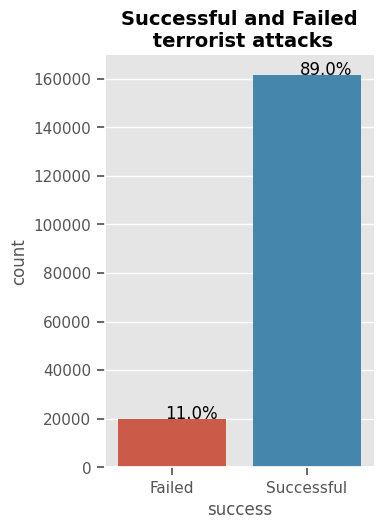

In [265]:
#carla
g=sns.catplot(x = "success", data= project_df, kind='count', height=5, aspect=0.8)
g.set_xticklabels({'Failed':0, 'Successful':1})
g.ax.set_title("Successful and Failed\n terrorist attacks", fontsize=14, fontweight=700);
annotate_without_hue_percent(g.ax, project_df.success)

There are more succesful attacks (89%) in the data than failed attacks (11%). This could lead to a bias in the classification of attacks. To handle this we will look into some of the techniques metioned [here](https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/#:~:text=Imbalanced%20data%20refers%20to%20those,very%20low%20number%20of%20observations.) and choose an appropriate one for our project.

> The following features will be explored in this section

1. Duration>24hrs (If attack duration was greater than 24hrs or not)
2. ismultiple (Was the attack a single attack or multiple attack)
3. kid_is_hostage (Was a kid held hostage)

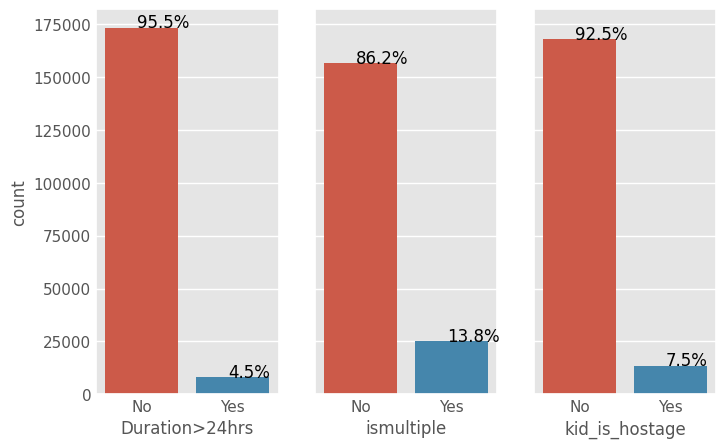

In [266]:
fig, axes=plt.subplots(1, 3, figsize=(8, 5), sharey=True)
for ax, col_name in zip(axes, ['Duration>24hrs', 'ismultiple', 'kid_is_hostage']):
  sns.countplot(data=project_df, x=col_name, ax=ax)
  ax.tick_params(axis=u'both', which=u'both',length=0)
  ax.set_xticklabels(['No', 'Yes'])
  if col_name in ['ismultiple', 'kid_is_hostage']:
    ax.set_ylabel("")
  annotate_without_hue_percent(ax=ax, feature=project_df[col_name])

Most terrorist attacks in our dataset have the following in common:

1. The duration are less than 24hrs.
2. They are mostly single attacks.
3. No Kid was held hostage in 93% of the attacks.
4. Most of the attacks are succesful.

>*country code and name*\
  *weapontype code and name*\
  *target type code and name*\
  *region type code and name*\
  *attack type code and name*

  In this section, we will be exploring the columns listed above to confirm the suspected fact that the encoding provided in the dataset are unique to each name it references so that that the encoding can be used in modelling.

In [267]:
#@title Sample_code_and_name (Select the fractions of sample to take using the slider). { run: "auto" }
def sample_code_and_name(df, code_column, name_column): 
  """
  This function takes a random sample of the
  encoding of a categorical variable and ensures the
  uniqueness of the encoding to the names of the sample

  Input: df: Pandas dataframe,
        code_column: The column containing the encoding
        name_column: The column with the names
  """
  sample_frac = 0.6 #@param {type:"slider", min:0.1, max:1, step:0.1}
  print(f"Sample size is {sample_frac}\n\n")
  for code in pd.Series(df[code_column].unique()).sample(frac=sample_frac):
    print(f"Number of values with {name_column.split('_')[0]} code {code} is: ",
          len(df.query(f'{code_column}=={code}')[f'{name_column}'].unique()))

In [268]:
sample_code_and_name(project_df, 'country_code', 'country_name')

Sample size is 0.6


Number of values with country code 74 is:  1
Number of values with country code 120 is:  1
Number of values with country code 156 is:  1
Number of values with country code 190 is:  1
Number of values with country code 112 is:  1
Number of values with country code 422 is:  1
Number of values with country code 174 is:  1
Number of values with country code 199 is:  1
Number of values with country code 76 is:  1
Number of values with country code 198 is:  1
Number of values with country code 21 is:  1
Number of values with country code 223 is:  1
Number of values with country code 34 is:  1
Number of values with country code 1001 is:  1
Number of values with country code 43 is:  1
Number of values with country code 176 is:  1
Number of values with country code 107 is:  1
Number of values with country code 121 is:  1
Number of values with country code 1004 is:  1
Number of values with country code 6 is:  1
Number of values with country code 221 is:  1
Number of values w

In [269]:
sample_code_and_name(project_df, 'region_code', 'region_name')

Sample size is 0.6


Number of values with region code 6 is:  1
Number of values with region code 9 is:  1
Number of values with region code 8 is:  1
Number of values with region code 11 is:  1
Number of values with region code 5 is:  1
Number of values with region code 7 is:  1
Number of values with region code 12 is:  1


In [270]:
sample_code_and_name(project_df, 'targtype_code', 'targettype_name')

Sample size is 0.6


Number of values with targettype code 6 is:  1
Number of values with targettype code 12 is:  1
Number of values with targettype code 1 is:  1
Number of values with targettype code 4 is:  1
Number of values with targettype code 14 is:  1
Number of values with targettype code 10 is:  1
Number of values with targettype code 18 is:  1
Number of values with targettype code 3 is:  1
Number of values with targettype code 19 is:  1
Number of values with targettype code 7 is:  1
Number of values with targettype code 9 is:  1
Number of values with targettype code 15 is:  1
Number of values with targettype code 8 is:  1


In [271]:
sample_code_and_name(project_df, 'weapontype_code', 'weapontype_name')

Sample size is 0.6


Number of values with weapontype code 7 is:  1
Number of values with weapontype code 12 is:  1
Number of values with weapontype code 1 is:  1
Number of values with weapontype code 9 is:  1
Number of values with weapontype code 13 is:  1
Number of values with weapontype code 6 is:  1
Number of values with weapontype code 8 is:  1


In [272]:
sample_code_and_name(project_df, 'attacktype_code', 'attacktype')

Sample size is 0.6


Number of values with attacktype code 5 is:  1
Number of values with attacktype code 2 is:  1
Number of values with attacktype code 3 is:  1
Number of values with attacktype code 8 is:  1
Number of values with attacktype code 1 is:  1


From the above with 60% of the sample taken, we are able to confirm that the code associated with each name are indeed unique. Hence we can use the code in our model without having to encode the categorical variable for the above inspected column again.

> **Which Region, Country and City have the highest number of terrorist attacks?**

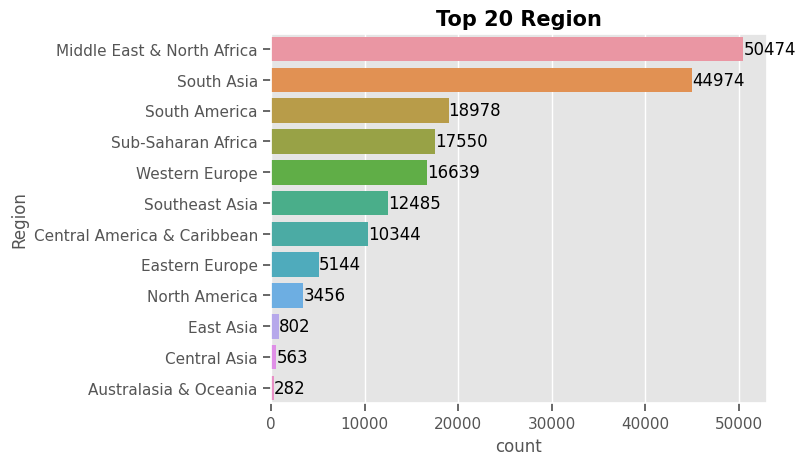

In [273]:
def plot_column_value_count(df, column_name):
  """This function takes in  a dataframe and
     column name and plots a bar chart of the
     count of values for the top 20 values 
     in that column.

     Input:
      df: pandas dataframe
      column_name: Name of column to plot the bar chart for.
  """
  column_title = column_name.split('_')[0].title()
  # carla
  # count the values
  graph=df[column_name].value_counts().to_frame(name='count').reset_index().head(20)
  graph.rename(columns = {'index':column_title}, inplace = True)

  # customize the plot
  ax = sns.barplot(x='count', y=column_title, data=graph)
  ax.set_title(f"Top 20 {column_title}", fontsize=15, fontweight=700)
  for container in ax.containers: 
      ax.bar_label(container)

plot_column_value_count(project_df, 'region_name')

Middle east and North Africa followed by South Asia have the highest number (500474 and 44974 respectively) of terrorist attack.


Now we are going to visualize the top 20 most attacked countries and cities.

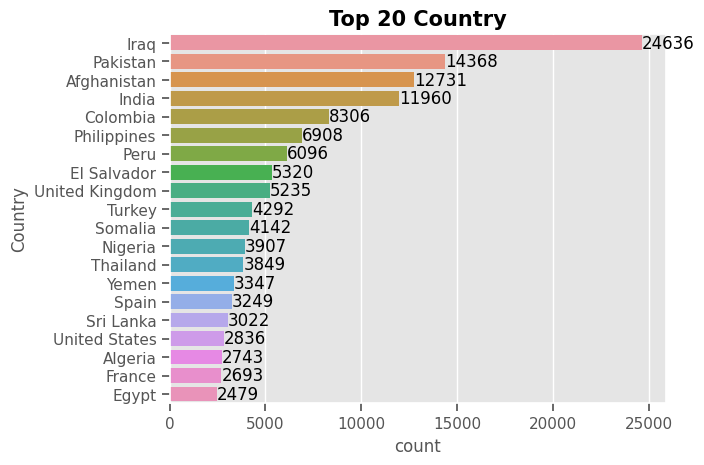

In [274]:
#carla
plot_column_value_count(project_df, 'country_name')

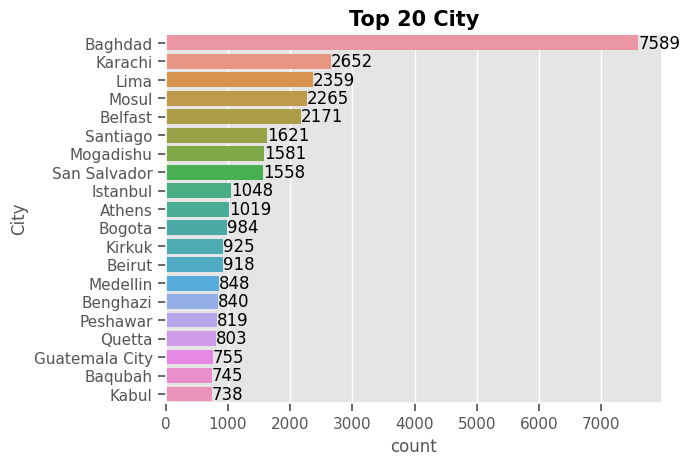

In [275]:
#carla
plot_column_value_count(project_df[project_df.city != "Unknown"], 'city')

In conclusion, as at 2017, terrorist attack is most common the Middle East and south asia in the country of Iraq and Pakistan and in the city of Baghdad. Though in [recent](https://en.wikipedia.org/wiki/January_2021_Baghdad_bombings) years, terrorist attack seems to be dropping in frequency. 

> **Which is the most common target type, attack type and group**

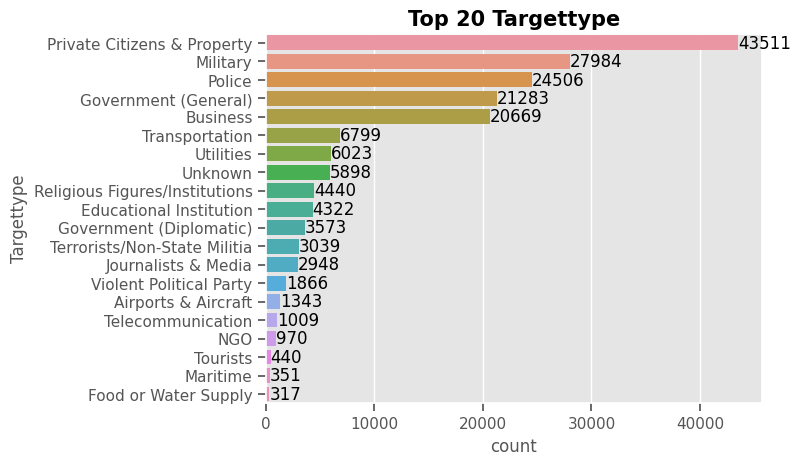

In [276]:
plot_column_value_count(project_df, 'targettype_name')

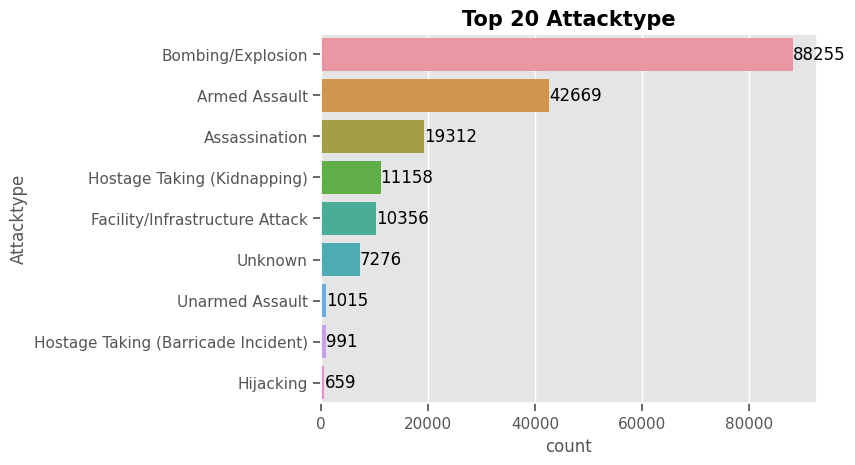

In [277]:
plot_column_value_count(project_df, 'attacktype')

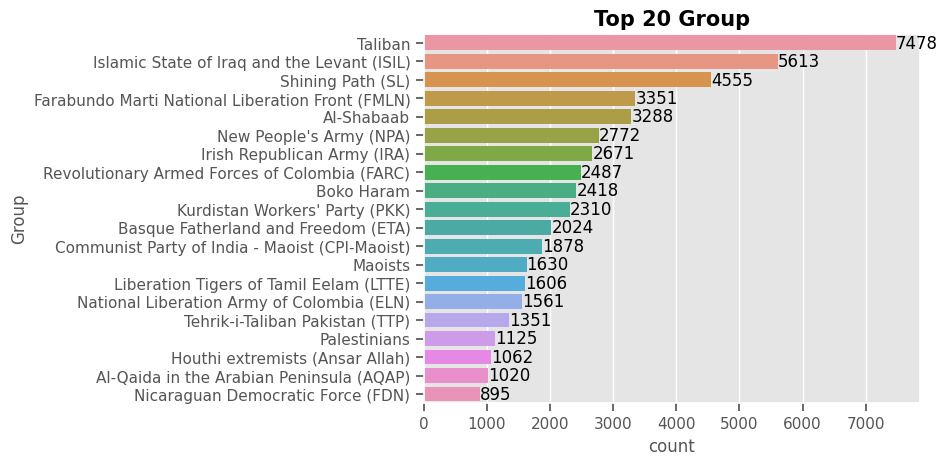

In [278]:
plot_column_value_count(project_df[project_df.group_name != 'Unknown'], 'group_name')

> **Which group have the highest rate of successful attacks?**

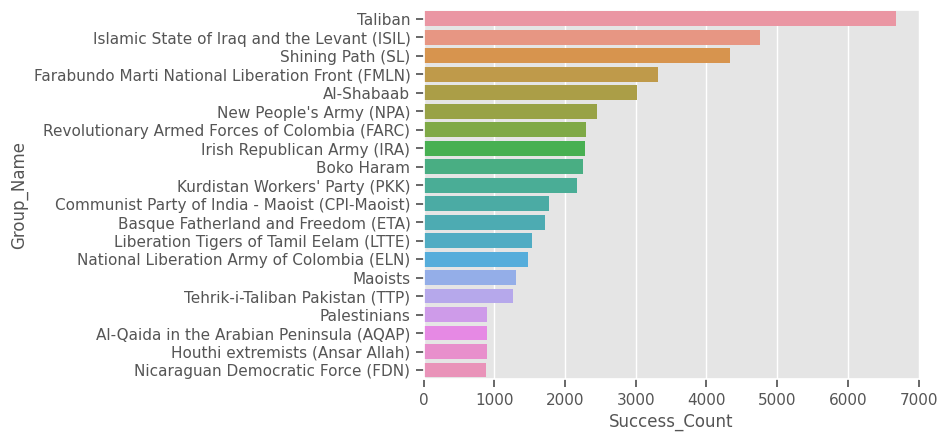

In [279]:
graph_data=pd.DataFrame(project_df.query("success==1")['group_name'].value_counts().reset_index())
graph_data.rename(columns={'index': 'Group_Name', 'group_name': 'Success_Count'}, inplace=True)
graph_data=graph_data.query('Group_Name != "Unknown"').head(20)

ax=sns.barplot(data=graph_data, x='Success_Count',
              y='Group_Name')
# # g.ax.legend({'Failed':0, 'Success':1})
# g.ax.set_title("Successful and Failed\n terrorist attacks by group",  fontsize=15, fontweight= 700)
# for container in g.ax.containers: 
#   g.ax.bar_label(container)
# g.ax.set_xscale('log')

The most common terrorist ***attack type, target type, group, and the group with the highest number of success*** are ***Bombing and explosion, Private Citizens and property, Taliban and Taliban*** respectively.

#### ***Bivariate and Multivariate Exploration***


>**How has succeful terrorist attack increased or decreased between the year 1970 to 2017?**

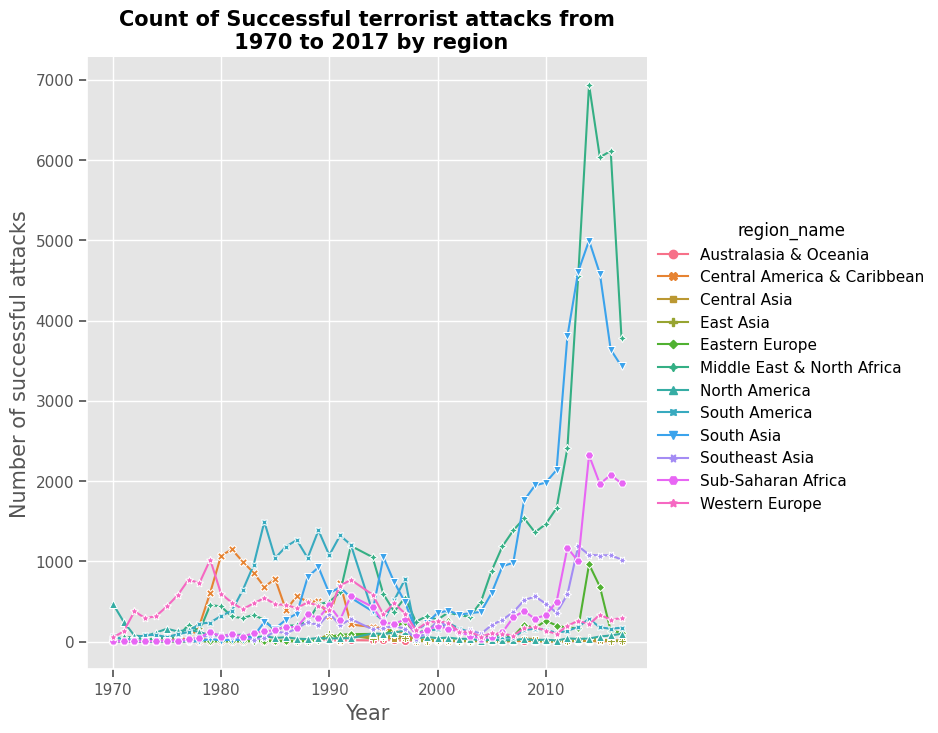

In [280]:
# ##carla
# count the number of terrorist attacks by region and year
graph=project_df[['success','region_name','year']]\
      .groupby(['region_name','year'])['success'].count()\
      .to_frame(name='total_attacks').reset_index()

# draw the graph
sns.relplot(data=graph, x="year", y="total_attacks", 
           hue="region_name", style="region_name",
           kind="line", height=7, markers=True, dashes=False);

# # customize plot
plt.title('Count of Successful terrorist attacks from\n 1970 to 2017 by region',fontsize=15,
          fontweight=700)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of successful attacks', fontsize=15);

From the above it can be seen that there have been an increase in the number of successful terrorist attacks in at least seven regions over the years with the most notable being South Asia and Middle East&North Africa most especially between the years 2000 to 2017.

In [281]:
#carla
#this graph to show by region and country the sucess atacks by terroris groups and its weapons. Please review it and determine if this graph it is going to be useful.


import plotly.express as px

graph_map=pd.DataFrame(project_df.query("success==1")[['group_name', 'country_name', 'region_name','attacktype']].value_counts().reset_index())
graph_map.rename(columns={0: 'Success_Count'}, inplace=True)
graph_map=graph_map.query("group_name != 'Unknown'")
graph_map=graph_map.query("attacktype != 'Unknown'").head(100)


fig = px.treemap(graph_map,
                 path=['region_name', 'country_name', 'group_name','attacktype'],
                 values='Success_Count',
                 color='Success_Count',color_continuous_scale='YlOrBr')#'RdYlGn'

fig.update_layout(title="Success terrorist attacks group by country and region",font=dict(
                   size=15), width=1000, height=700)
#fig.data[0].textinfo = 'percent {parent|root|entry}'

fig.show()

---
## **Modelling**
---

In [282]:
project_df.head()

,year,month,day,country_code,country_name,region_code,region_name,Duration>24hrs,city,ismultiple,success,attacktype_code,attacktype,targtype_code,targettype_name,weapontype_code,weapontype_name,kid_is_hostage,group_name
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,0,Santo Domingo,0,1,1,Assassination,14,Private Citizens & Property,13,Unknown,0,MANO-D
1,1970,0,0,130,Mexico,1,North America,0,Mexico city,0,1,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),13,Unknown,1,23rd of September Communist League
2,1970,1,0,160,Philippines,5,Southeast Asia,0,Unknown,0,1,1,Assassination,10,Journalists & Media,13,Unknown,0,Unknown
3,1970,1,0,78,Greece,8,Western Europe,0,Athens,0,1,3,Bombing/Explosion,7,Government (Diplomatic),6,Explosives,0,Unknown
4,1970,1,0,101,Japan,4,East Asia,0,Fukouka,0,1,7,Facility/Infrastructure Attack,7,Government (Diplomatic),8,Incendiary,0,Unknown


In [283]:
# dropping unecessary columns.  for example if we have country name then theres no need for country code, and year wont matter 
project_df = project_df.drop(['year','country_code', 'attacktype_code', 'targtype_code', 'weapontype_code'], axis=1)

In [284]:
project_df.shape

(181691, 14)

In [285]:
project_df.head()

,month,day,country_name,region_code,region_name,Duration>24hrs,city,ismultiple,success,attacktype,targettype_name,weapontype_name,kid_is_hostage,group_name
0,7,2,Dominican Republic,2,Central America & Caribbean,0,Santo Domingo,0,1,Assassination,Private Citizens & Property,Unknown,0,MANO-D
1,0,0,Mexico,1,North America,0,Mexico city,0,1,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,1,23rd of September Communist League
2,1,0,Philippines,5,Southeast Asia,0,Unknown,0,1,Assassination,Journalists & Media,Unknown,0,Unknown
3,1,0,Greece,8,Western Europe,0,Athens,0,1,Bombing/Explosion,Government (Diplomatic),Explosives,0,Unknown
4,1,0,Japan,4,East Asia,0,Fukouka,0,1,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,0,Unknown


In [286]:
# Subsetting Data - data is too much and would cause a RAM crash during oneHotencoding

project_df_us = project_df[project_df['country_name'] == 'United States']
project_df_us.shape

(2836, 14)

In [287]:
project_df_us['success'].value_counts()

1    2340
0     496
Name: success, dtype: int64

In [288]:
project_df_us.columns

Index(['month', 'day', 'country_name', 'region_code', 'region_name',
       'Duration>24hrs', 'city', 'ismultiple', 'success', 'attacktype',
       'targettype_name', 'weapontype_name', 'kid_is_hostage', 'group_name'],
      dtype='object')

**Split data to features and target for preprocessing:**

In [289]:
features = project_df_us.drop(['success'], axis=1) 
target = project_df_us['success']

**Encode the categorical columns using one-hot encoding:**

In [290]:
categorical_cols = ['country_name', 'region_name', 'city','attacktype', 'targettype_name', 'weapontype_name','group_name']
features_encoded = pd.get_dummies(features, columns=categorical_cols)

In [291]:
features_encoded.head()

,month,day,region_code,Duration>24hrs,ismultiple,kid_is_hostage,country_name_United States,region_name_North America,city_Afton,city_Aguada,city_Aguadilla,city_Aibonito,city_Akron,city_Alabama City,city_Alameda,city_Alamogordo,city_Albany,city_Albertville,city_Albion,city_Albuquerque,city_Alexandria,city_Alhambra,city_Altadena,city_Alton,city_Amarillo,city_Ames,city_Amherst,city_Anaheim,city_Anamosa,city_Ann Arbor,city_Annapolis,city_Antioch,city_Appleton,city_Aptos,city_Arcata,city_Arecibo,city_Arivaca,city_Arlington,city_Asbury,city_Asheville,city_Ashland,city_Ashville,city_Astoria,city_Athens,city_Atherton,city_Atlanta,city_Auburn,city_Augusta,city_Aurora,city_Austin,city_Axton,city_Aztec,city_Bailey's Crossroads,city_Bakersfield,city_Baltimore,city_Baraboo,city_Barnegat,city_Batavia,city_Baton Rouge,city_Baxter Springs,city_Bayamon,city_Beaumont,city_Bedford Park,city_Bel Air,city_Bellevue,city_Bellflower,city_Bellingham,city_Belmont,city_Ben Lomond,city_Bend,city_Berkeley,city_Berlin,city_Bessemer,city_Bethesda,city_Beverly Hills,...,group_name_People's Revolutionary Party,group_name_Phineas Priesthood,group_name_Popular Front for the Liberation of Palestine (PFLP),group_name_Popular Liberation Army (Puerto Rico),group_name_Posse Comitatus,group_name_Pro-LGBT Rights extremists,group_name_Provisional Coordinating Committee for the Defense of Labor,group_name_Puerto Rican Armed Resistance,group_name_Puerto Rican Liberation Front,group_name_Puerto Rican Nationalists,group_name_Puerto Rican Resistance Movement,group_name_Puerto Rican Revolutionary Movement,group_name_Qaddafi loyalists,group_name_Quartermoon Society,group_name_ROSADO-SOTO Command,group_name_Rajneeshees,group_name_Red Guerilla Family,group_name_Regulators,group_name_Republic of New Afrika,group_name_Republic of Texas,group_name_Revenge of the Trees,group_name_Revolutionary Action Party,group_name_Revolutionary Cells-Animal Liberation Brigade,group_name_Revolutionary Commandos of the People (CRP),group_name_Revolutionary Communist Youth Brigade (RCYB),group_name_Revolutionary Force 26,group_name_Revolutionary Force 9,group_name_Revolutionary Force Seven,group_name_Revolutionary Labor Commandos,group_name_Right-wing extremists,group_name_Save Our Israel Land,group_name_Seattle Liberation Front,group_name_Secret Army Organization,group_name_Secret Cuban Government,group_name_Secret Organization Zero,group_name_Serbian Nationalists,group_name_Sons of Liberty,group_name_Sons of the Gestapo,group_name_Sovereign Citizen,group_name_Stop the War Coalition,group_name_Strikers,group_name_Student Radicals,group_name_Students For Insurrection,group_name_Students for a Democratic Society,group_name_Supporters of Charles Manson,group_name_Symbionese Liberation Army (SLA),group_name_Tehrik-i-Taliban Pakistan (TTP),group_name_The Jewish Execution with Silence,group_name_The Justice Department,group_name_The Order (Silent Brotherhood),group_name_The Order II (Bruder Schweigen Strike Force II),group_name_The Scorpion,group_name_The World United Formosans for Independence (WUFI),group_name_Thunder of Zion,group_name_Tontons Macoutes,group_name_Tribal Thumb,group_name_United Aryan Empire,group_name_United Freedom Front (UFF),group_name_United Jewish Underground,group_name_Universal Proutist Revolutionary Federation,group_name_Unknown,"group_name_Up the IRS, Inc",group_name_Veterans United for Non-Religious Memorials,group_name_Vietnamese Organization to Exterminate Communists and Restore the Nation,group_name_Vietnamese Refugees,"group_name_Weather Underground, Weathermen",group_name_Welsh Extremists,group_name_White Panther Party,group_name_White Rabbit Three Percent Illinois Patriot Freedom Fighters Militia,group_name_White extremists,group_name_World Church of the Creator,group_name_Worldwide Organization of Native Taiwanese,group_name_Young Cuba,group_name_Youth of the Star,group_name_Zebra killers
5,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

**Rename column to avoid model training error e.g LightGBM Classifier would throw an error**

In [292]:
#import regular expression
import re

In [293]:
#remove special characters in columns e.g Duration>24hrs

features_encoded = features_encoded.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [294]:
features_encoded.head()

,month,day,region_code,Duration24hrs,ismultiple,kid_is_hostage,country_name_UnitedStates,region_name_NorthAmerica,city_Afton,city_Aguada,city_Aguadilla,city_Aibonito,city_Akron,city_AlabamaCity,city_Alameda,city_Alamogordo,city_Albany,city_Albertville,city_Albion,city_Albuquerque,city_Alexandria,city_Alhambra,city_Altadena,city_Alton,city_Amarillo,city_Ames,city_Amherst,city_Anaheim,city_Anamosa,city_AnnArbor,city_Annapolis,city_Antioch,city_Appleton,city_Aptos,city_Arcata,city_Arecibo,city_Arivaca,city_Arlington,city_Asbury,city_Asheville,city_Ashland,city_Ashville,city_Astoria,city_Athens,city_Atherton,city_Atlanta,city_Auburn,city_Augusta,city_Aurora,city_Austin,city_Axton,city_Aztec,city_BaileysCrossroads,city_Bakersfield,city_Baltimore,city_Baraboo,city_Barnegat,city_Batavia,city_BatonRouge,city_BaxterSprings,city_Bayamon,city_Beaumont,city_BedfordPark,city_BelAir,city_Bellevue,city_Bellflower,city_Bellingham,city_Belmont,city_BenLomond,city_Bend,city_Berkeley,city_Berlin,city_Bessemer,city_Bethesda,city_BeverlyHills,...,group_name_PeoplesRevolutionaryParty,group_name_PhineasPriesthood,group_name_PopularFrontfortheLiberationofPalestinePFLP,group_name_PopularLiberationArmyPuertoRico,group_name_PosseComitatus,group_name_ProLGBTRightsextremists,group_name_ProvisionalCoordinatingCommitteefortheDefenseofLabor,group_name_PuertoRicanArmedResistance,group_name_PuertoRicanLiberationFront,group_name_PuertoRicanNationalists,group_name_PuertoRicanResistanceMovement,group_name_PuertoRicanRevolutionaryMovement,group_name_Qaddafiloyalists,group_name_QuartermoonSociety,group_name_ROSADOSOTOCommand,group_name_Rajneeshees,group_name_RedGuerillaFamily,group_name_Regulators,group_name_RepublicofNewAfrika,group_name_RepublicofTexas,group_name_RevengeoftheTrees,group_name_RevolutionaryActionParty,group_name_RevolutionaryCellsAnimalLiberationBrigade,group_name_RevolutionaryCommandosofthePeopleCRP,group_name_RevolutionaryCommunistYouthBrigadeRCYB,group_name_RevolutionaryForce26,group_name_RevolutionaryForce9,group_name_RevolutionaryForceSeven,group_name_RevolutionaryLaborCommandos,group_name_Rightwingextremists,group_name_SaveOurIsraelLand,group_name_SeattleLiberationFront,group_name_SecretArmyOrganization,group_name_SecretCubanGovernment,group_name_SecretOrganizationZero,group_name_SerbianNationalists,group_name_SonsofLiberty,group_name_SonsoftheGestapo,group_name_SovereignCitizen,group_name_StoptheWarCoalition,group_name_Strikers,group_name_StudentRadicals,group_name_StudentsForInsurrection,group_name_StudentsforaDemocraticSociety,group_name_SupportersofCharlesManson,group_name_SymbioneseLiberationArmySLA,group_name_TehrikiTalibanPakistanTTP,group_name_TheJewishExecutionwithSilence,group_name_TheJusticeDepartment,group_name_TheOrderSilentBrotherhood,group_name_TheOrderIIBruderSchweigenStrikeForceII,group_name_TheScorpion,group_name_TheWorldUnitedFormosansforIndependenceWUFI,group_name_ThunderofZion,group_name_TontonsMacoutes,group_name_TribalThumb,group_name_UnitedAryanEmpire,group_name_UnitedFreedomFrontUFF,group_name_UnitedJewishUnderground,group_name_UniversalProutistRevolutionaryFederation,group_name_Unknown,group_name_UptheIRSInc,group_name_VeteransUnitedforNonReligiousMemorials,group_name_VietnameseOrganizationtoExterminateCommunistsandRestoretheNation,group_name_VietnameseRefugees,group_name_WeatherUndergroundWeathermen,group_name_WelshExtremists,group_name_WhitePantherParty,group_name_WhiteRabbitThreePercentIllinoisPatriotFreedomFightersMilitia,group_name_Whiteextremists,group_name_WorldChurchoftheCreator,group_name_WorldwideOrganizationofNativeTaiwanese,group_name_YoungCuba,group_name_YouthoftheStar,group_name_Zebrakillers
5,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,2,1,0,0

In [295]:
features_encoded.shape

(2836, 1012)

**Train-Test Split**

In [296]:
from sklearn.model_selection import train_test_split

In [297]:
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)


# **Experiment I - Without Over or UnderSampling**

<Axes: title={'center': 'Without Over or UnderSampling'}>

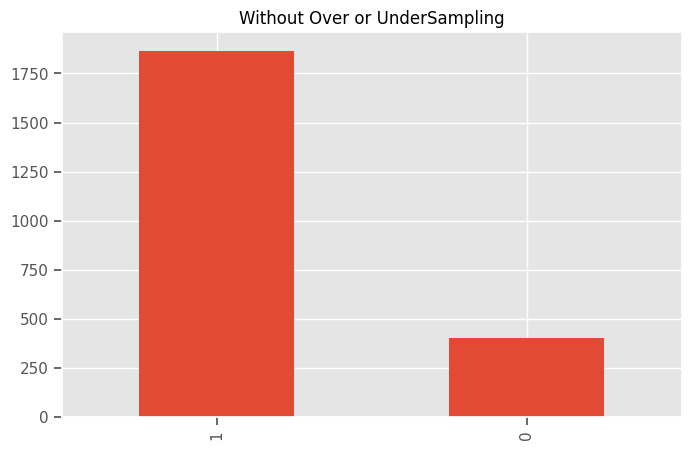

In [298]:
# to show imbalance
fig, (ax1) = plt.subplots(ncols = 1, figsize =(8, 5))
ax1.set_title('Without Over or UnderSampling')
pd.Series(y_train).value_counts().plot.bar(ax=ax1)

In [299]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2268, 1012)
Shape of X_test: (568, 1012)
Shape of y_train: (2268,)
Shape of y_test: (568,)


In [300]:
print("Class representation of y_train:\n", y_train.value_counts())
print("\nClass representation of y_test:\n", y_test.value_counts())

Class representation of y_train:
 1    1867
0     401
Name: success, dtype: int64

Class representation of y_test:
 1    473
0     95
Name: success, dtype: int64


**Importing Classifiers and Metrics for Evaluation** 

In [301]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import PassiveAggressiveClassifier, RidgeClassifier, Perceptron, SGDClassifier
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict

**Defining a function to run classifiers and evaluate predictions and performance**

In [302]:
def evaluate_classification_algorithms(Xtrain, Xtest, ytrain, ytest):
    
    # Create a dictionary of classification algorithms
    algorithms = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'SVM': SVC(),
        'KNN': KNeighborsClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'AdaBoost': AdaBoostClassifier(),
        'Neural Network': MLPClassifier(),
        'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
        'Extra Trees Classifier': ExtraTreesClassifier(),
        'Bagging Classifier': BaggingClassifier(),
        'Passive Aggressive Classifier': PassiveAggressiveClassifier(),
        'Perceptron': Perceptron(),
        'XGBoost Classifier': XGBClassifier(),
        'LightGBM Classifier': LGBMClassifier()
    }

    for algorithm_name, algorithm in algorithms.items():
        print(f"Evaluating {algorithm_name}...")
        
        # Fit the algorithm on the training data
        algorithm.fit(Xtrain, ytrain)
        
        # Make predictions on the testing data
        y_pred = algorithm.predict(Xtest)
        
        # Generate classification report
        classification_report_result = classification_report(ytest, y_pred)
        print("Classification Report:")
        print(classification_report_result)
        
        # Generate confusion matrix
        confusion_matrix_result = confusion_matrix(ytest, y_pred)
        
        # Generate heatmap confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrix_result, fmt='.2f', annot=True, cmap='Blues')
        plt.title(f"{algorithm_name} Confusion Matrix")
        plt.xlabel("Predicted Class")
        plt.ylabel("True Class")
        plt.show()
        
        
        print("---------------------------------------------------------------------------------\n\n")



Evaluating Logistic Regression...
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.16      0.26        95
           1       0.85      0.99      0.92       473

    accuracy                           0.85       568
   macro avg       0.80      0.57      0.59       568
weighted avg       0.84      0.85      0.81       568



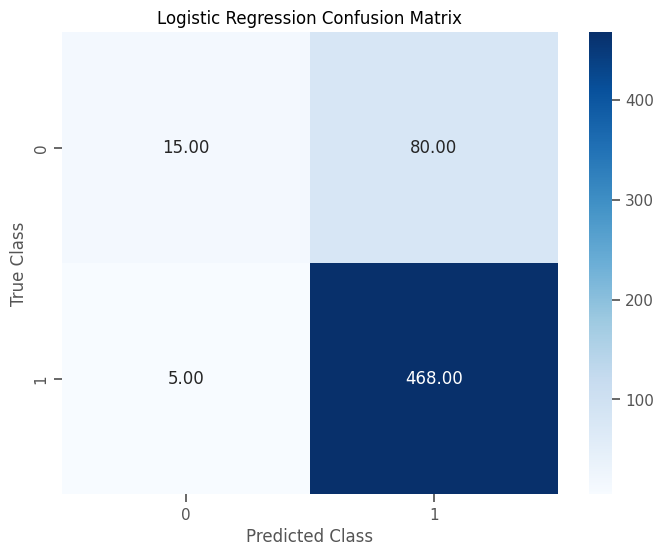

---------------------------------------------------------------------------------


Evaluating Decision Tree...
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.47      0.50        95
           1       0.90      0.91      0.90       473

    accuracy                           0.84       568
   macro avg       0.71      0.69      0.70       568
weighted avg       0.83      0.84      0.84       568



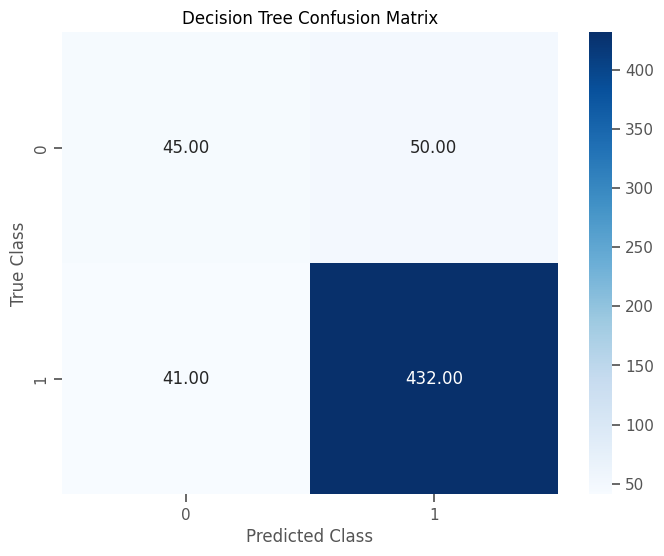

---------------------------------------------------------------------------------


Evaluating Random Forest...
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.32      0.45        95
           1       0.88      0.98      0.93       473

    accuracy                           0.87       568
   macro avg       0.83      0.65      0.69       568
weighted avg       0.86      0.87      0.85       568



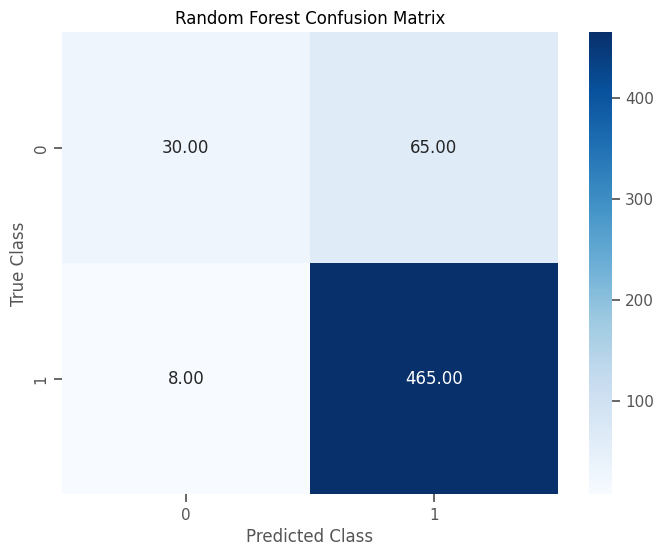

---------------------------------------------------------------------------------


Evaluating SVM...
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        95
           1       0.83      1.00      0.91       473

    accuracy                           0.83       568
   macro avg       0.42      0.50      0.45       568
weighted avg       0.69      0.83      0.76       568



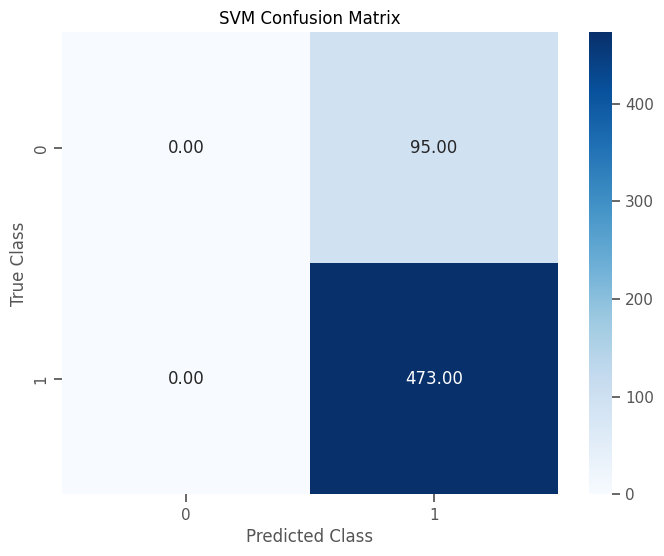

---------------------------------------------------------------------------------


Evaluating KNN...
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.23      0.31        95
           1       0.86      0.95      0.90       473

    accuracy                           0.83       568
   macro avg       0.66      0.59      0.60       568
weighted avg       0.79      0.83      0.80       568



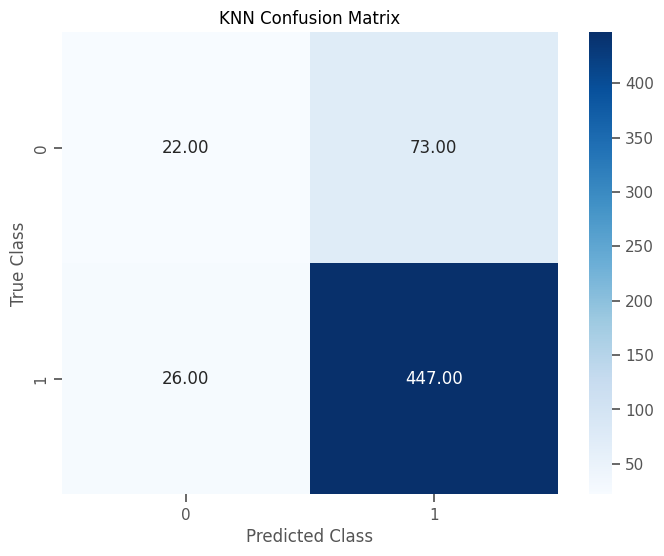

---------------------------------------------------------------------------------


Evaluating Gradient Boosting...
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.17      0.28        95
           1       0.86      0.99      0.92       473

    accuracy                           0.85       568
   macro avg       0.81      0.58      0.60       568
weighted avg       0.84      0.85      0.81       568



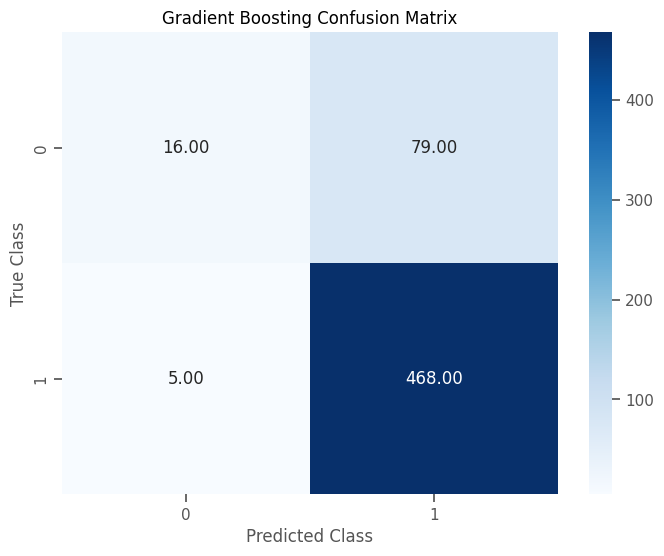

---------------------------------------------------------------------------------


Evaluating AdaBoost...
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.17      0.28        95
           1       0.86      0.99      0.92       473

    accuracy                           0.85       568
   macro avg       0.81      0.58      0.60       568
weighted avg       0.84      0.85      0.81       568



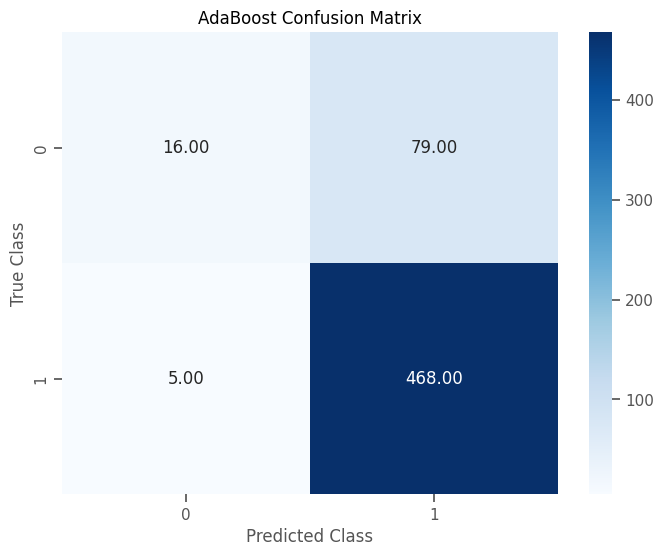

---------------------------------------------------------------------------------


Evaluating Neural Network...
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.45      0.43        95
           1       0.89      0.87      0.88       473

    accuracy                           0.80       568
   macro avg       0.65      0.66      0.65       568
weighted avg       0.81      0.80      0.80       568



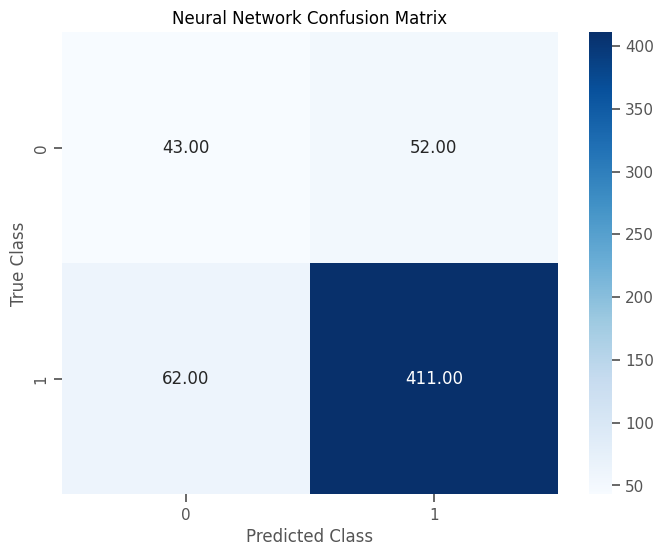

---------------------------------------------------------------------------------


Evaluating Quadratic Discriminant Analysis...
Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.33      0.26        95
           1       0.85      0.76      0.80       473

    accuracy                           0.69       568
   macro avg       0.53      0.54      0.53       568
weighted avg       0.74      0.69      0.71       568



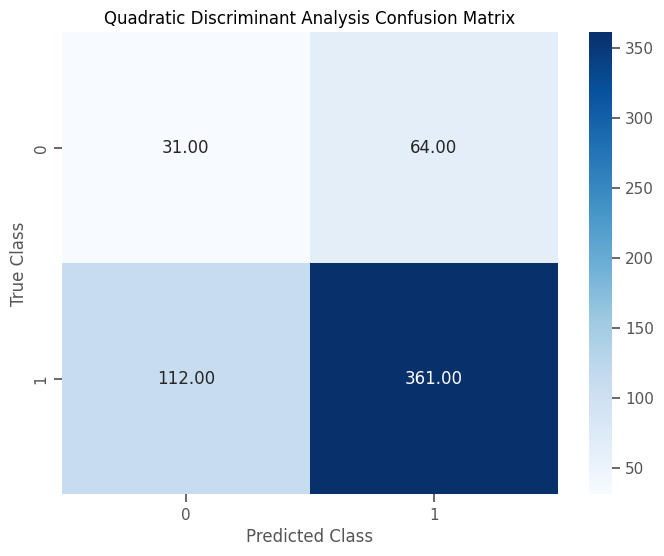

---------------------------------------------------------------------------------


Evaluating Extra Trees Classifier...
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.39      0.49        95
           1       0.89      0.96      0.92       473

    accuracy                           0.86       568
   macro avg       0.77      0.67      0.70       568
weighted avg       0.85      0.86      0.85       568



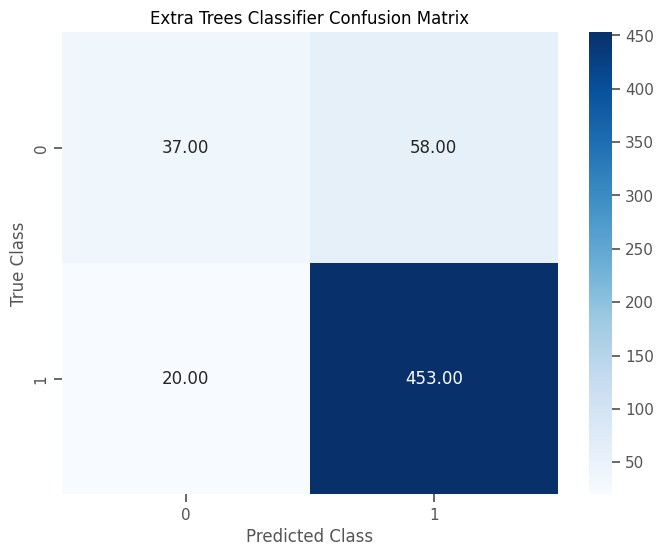

---------------------------------------------------------------------------------


Evaluating Bagging Classifier...
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.39      0.47        95
           1       0.89      0.95      0.91       473

    accuracy                           0.85       568
   macro avg       0.74      0.67      0.69       568
weighted avg       0.84      0.85      0.84       568



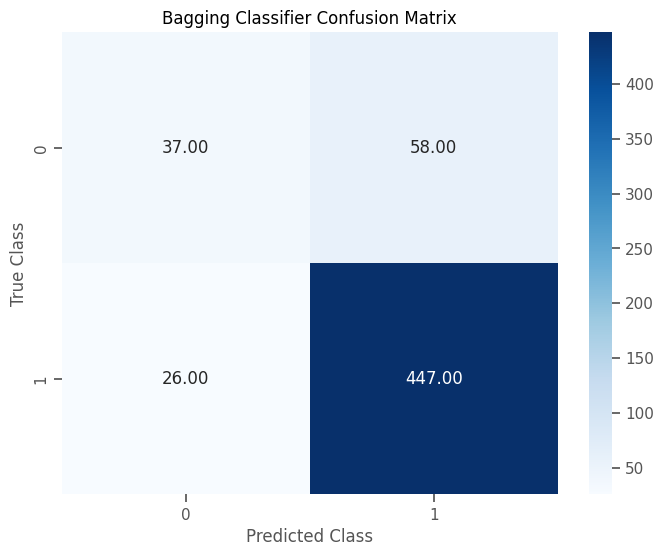

---------------------------------------------------------------------------------


Evaluating Passive Aggressive Classifier...
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.24      0.29        95
           1       0.86      0.91      0.88       473

    accuracy                           0.80       568
   macro avg       0.61      0.58      0.59       568
weighted avg       0.77      0.80      0.78       568



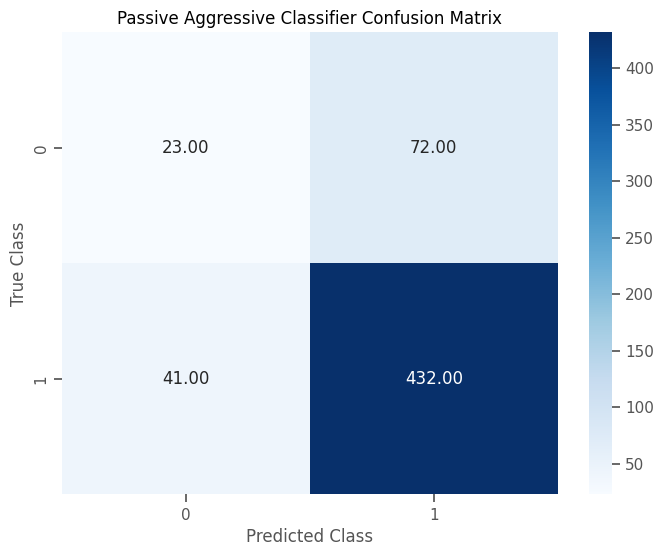

---------------------------------------------------------------------------------


Evaluating Perceptron...
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.08      0.15        95
           1       0.84      0.99      0.91       473

    accuracy                           0.84       568
   macro avg       0.79      0.54      0.53       568
weighted avg       0.82      0.84      0.79       568



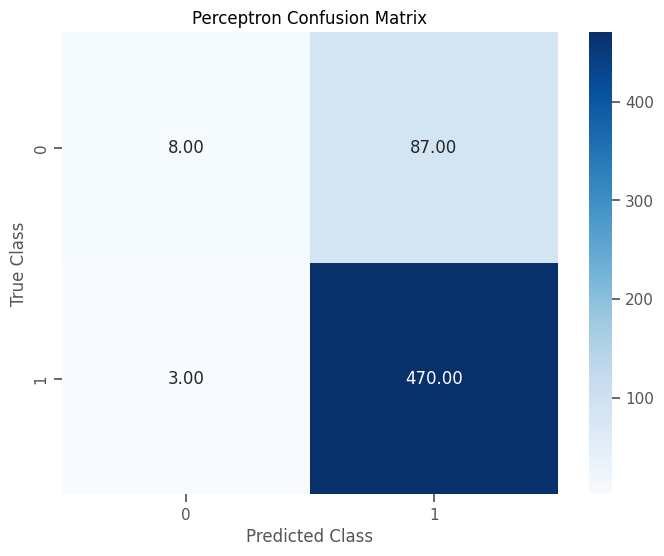

---------------------------------------------------------------------------------


Evaluating XGBoost Classifier...
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.31      0.39        95
           1       0.87      0.95      0.91       473

    accuracy                           0.84       568
   macro avg       0.70      0.63      0.65       568
weighted avg       0.81      0.84      0.82       568



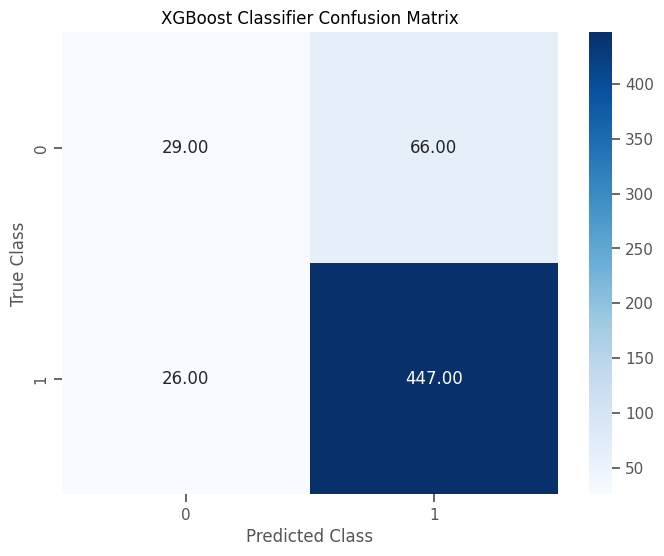

---------------------------------------------------------------------------------


Evaluating LightGBM Classifier...
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.29      0.39        95
           1       0.87      0.96      0.91       473

    accuracy                           0.85       568
   macro avg       0.73      0.63      0.65       568
weighted avg       0.83      0.85      0.83       568



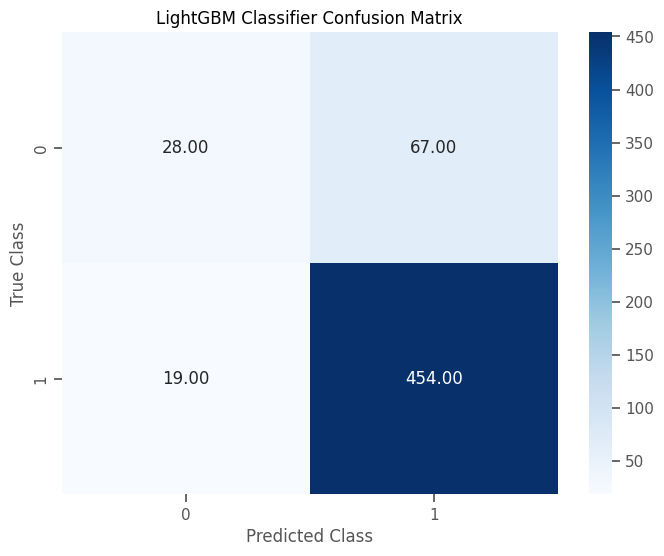

---------------------------------------------------------------------------------




In [303]:
evaluate_classification_algorithms(X_train, X_test, y_train, y_test)


# **Experiment II - With OverSampling using SMOTE+ENN**

In [304]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state=42)
X_train_smoteenn, y_train_smoteenn = sm.fit_resample(X_train, y_train.ravel())

In [305]:
counter = Counter(y_train)
print('Before', counter)
print('\n')
counter = Counter(y_train_smoteenn)
print('After', counter)

Before Counter({1: 1867, 0: 401})


After Counter({1: 1867, 0: 1867})


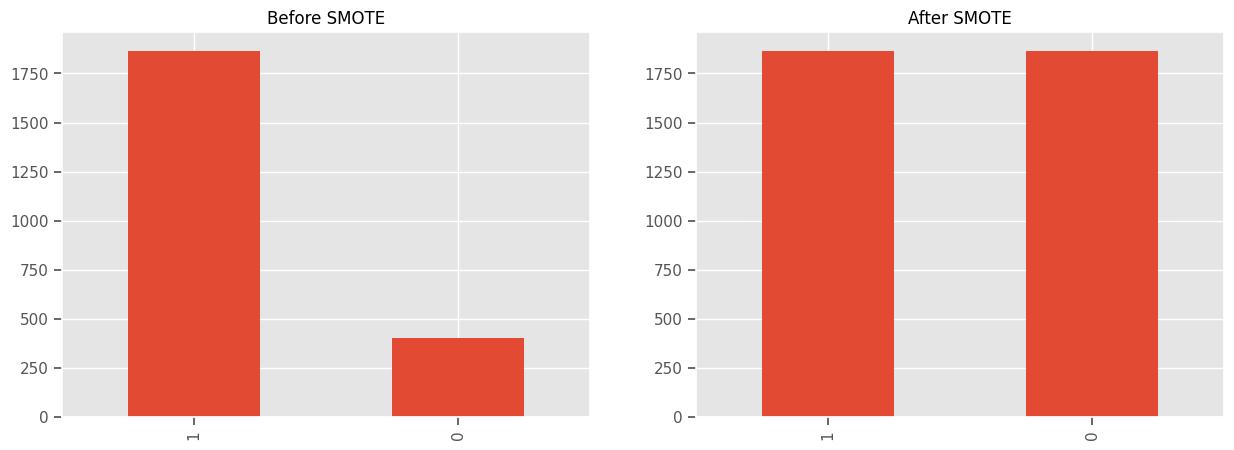

In [306]:
# to demonstrate the effect of SMOTE over imbalanced datasets
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(15, 5))
ax1.set_title('Before SMOTE')
pd.Series(y_train).value_counts().plot.bar(ax=ax1)


ax2.set_title('After SMOTE')  
pd.Series(y_train_smoteenn).value_counts().plot.bar(ax=ax2)

plt.show()

In [307]:
print("Shape of X_train_smoteenn:", X_train_smoteenn.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train_smoteenn:", y_train_smoteenn.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_smoteenn: (3734, 1012)
Shape of X_test: (568, 1012)
Shape of y_train_smoteenn: (3734,)
Shape of y_test: (568,)


**Now Theres Balance**

![Sample Image](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ9Fcfle48djZvpnz_rwxopp2FQhIjqu7FieA&usqp=CAU)




![Animated GIF](https://media.tenor.com/nAvyrJVMfsQAAAAd/portable-god-abeg-o.gif)


Evaluating Logistic Regression...
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.38      0.44        95
           1       0.88      0.93      0.91       473

    accuracy                           0.84       568
   macro avg       0.70      0.65      0.67       568
weighted avg       0.82      0.84      0.83       568



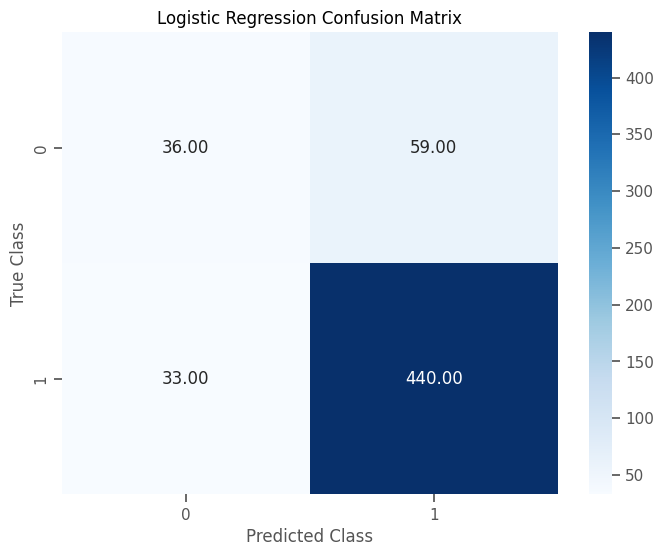

---------------------------------------------------------------------------------


Evaluating Decision Tree...
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.41      0.38        95
           1       0.88      0.85      0.86       473

    accuracy                           0.77       568
   macro avg       0.61      0.63      0.62       568
weighted avg       0.79      0.77      0.78       568



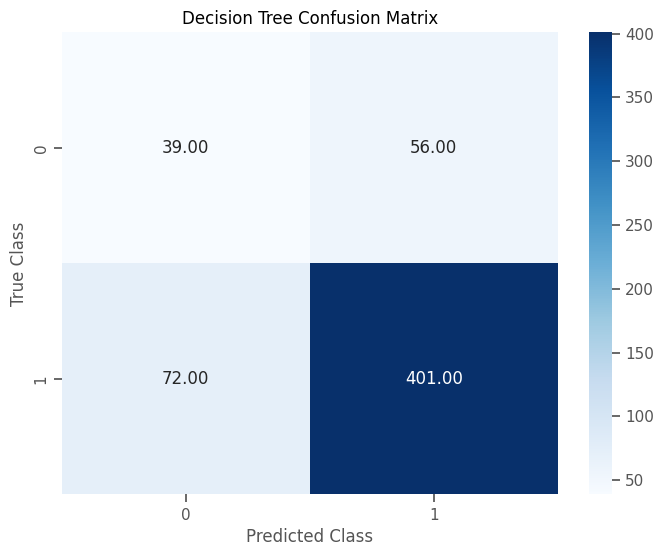

---------------------------------------------------------------------------------


Evaluating Random Forest...
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.53      0.51        95
           1       0.90      0.89      0.90       473

    accuracy                           0.83       568
   macro avg       0.70      0.71      0.70       568
weighted avg       0.83      0.83      0.83       568



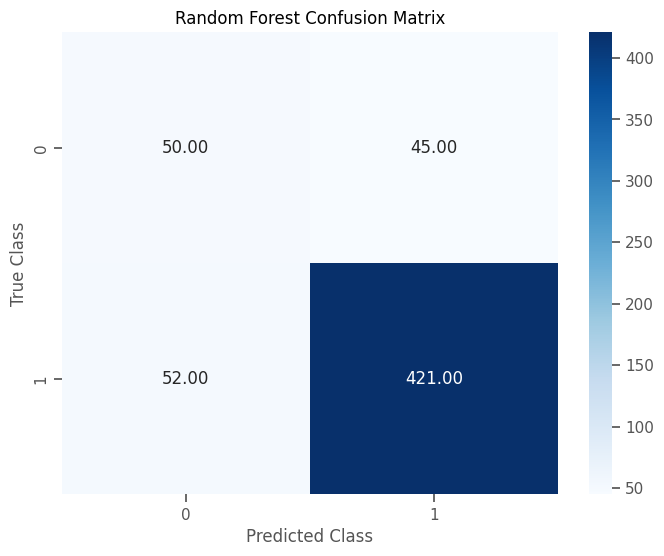

---------------------------------------------------------------------------------


Evaluating SVM...
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.69      0.36        95
           1       0.90      0.58      0.70       473

    accuracy                           0.60       568
   macro avg       0.58      0.63      0.53       568
weighted avg       0.79      0.60      0.65       568



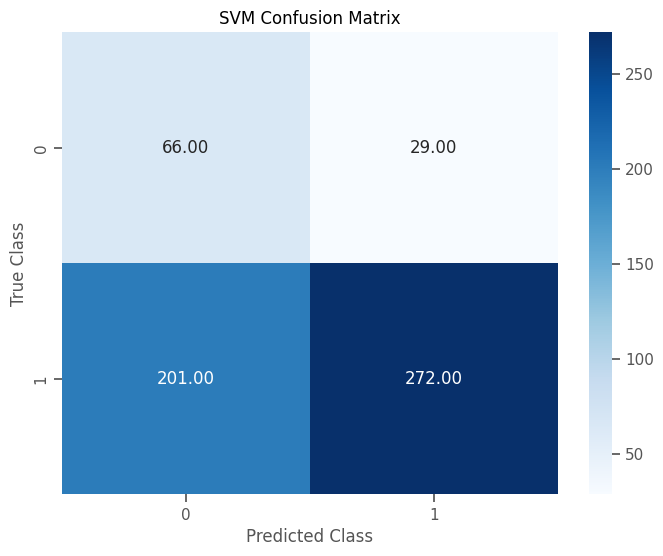

---------------------------------------------------------------------------------


Evaluating KNN...
Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.92      0.34        95
           1       0.95      0.30      0.45       473

    accuracy                           0.40       568
   macro avg       0.58      0.61      0.39       568
weighted avg       0.82      0.40      0.43       568



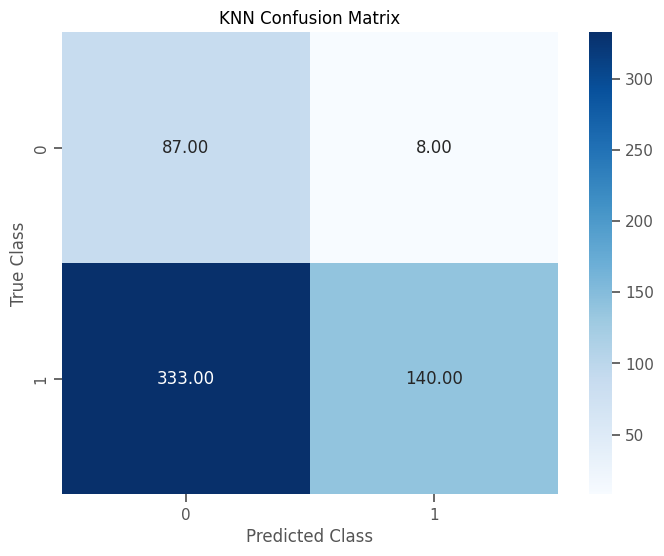

---------------------------------------------------------------------------------


Evaluating Gradient Boosting...
Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.46      0.42        95
           1       0.89      0.85      0.87       473

    accuracy                           0.78       568
   macro avg       0.63      0.66      0.64       568
weighted avg       0.80      0.78      0.79       568



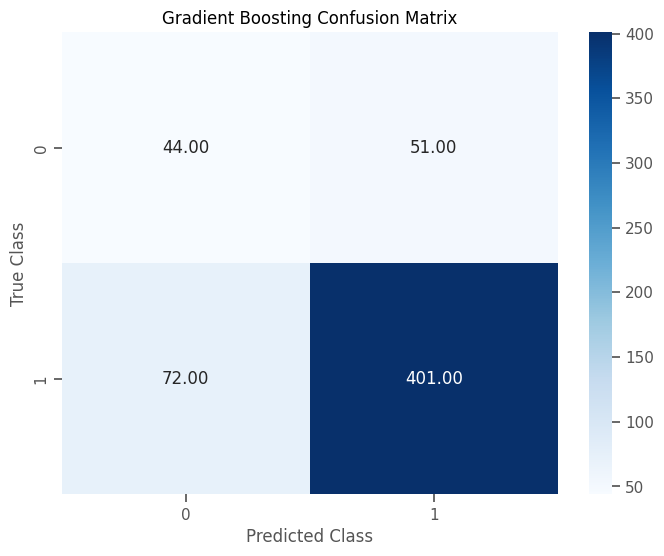

---------------------------------------------------------------------------------


Evaluating AdaBoost...
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.40      0.36        95
           1       0.87      0.84      0.86       473

    accuracy                           0.76       568
   macro avg       0.60      0.62      0.61       568
weighted avg       0.78      0.76      0.77       568



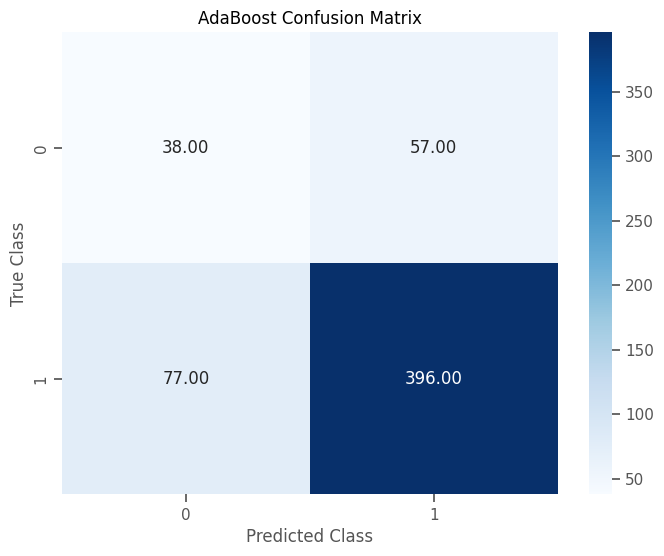

---------------------------------------------------------------------------------


Evaluating Neural Network...
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.52      0.42        95
           1       0.89      0.81      0.85       473

    accuracy                           0.76       568
   macro avg       0.62      0.66      0.63       568
weighted avg       0.80      0.76      0.78       568



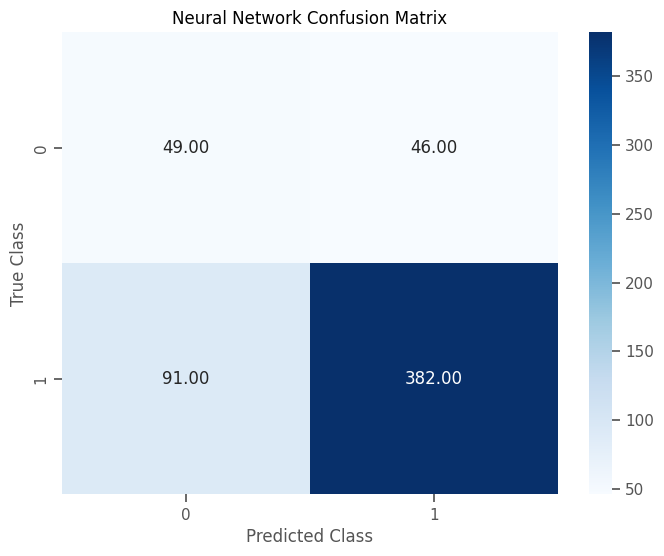

---------------------------------------------------------------------------------


Evaluating Quadratic Discriminant Analysis...
Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.76      0.31        95
           1       0.88      0.37      0.52       473

    accuracy                           0.43       568
   macro avg       0.54      0.56      0.42       568
weighted avg       0.77      0.43      0.49       568



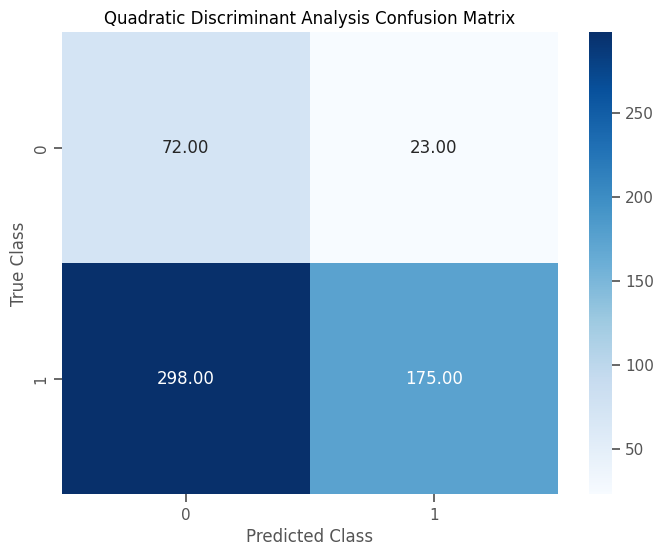

---------------------------------------------------------------------------------


Evaluating Extra Trees Classifier...
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.52      0.49        95
           1       0.90      0.88      0.89       473

    accuracy                           0.82       568
   macro avg       0.68      0.70      0.69       568
weighted avg       0.83      0.82      0.82       568



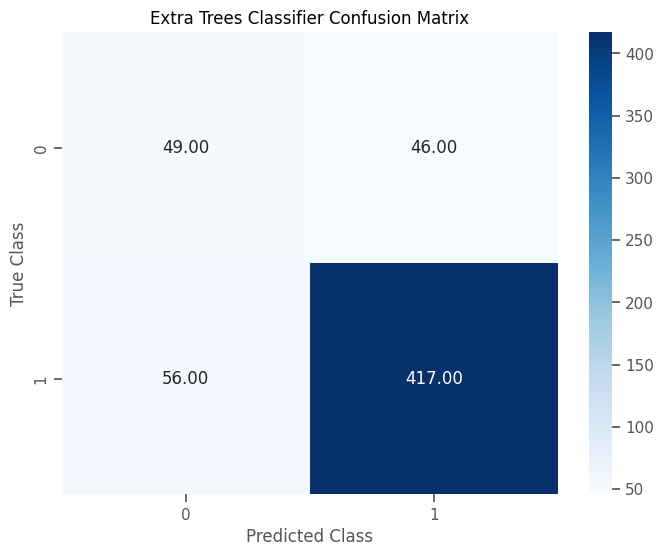

---------------------------------------------------------------------------------


Evaluating Bagging Classifier...
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.46      0.43        95
           1       0.89      0.86      0.87       473

    accuracy                           0.79       568
   macro avg       0.64      0.66      0.65       568
weighted avg       0.81      0.79      0.80       568



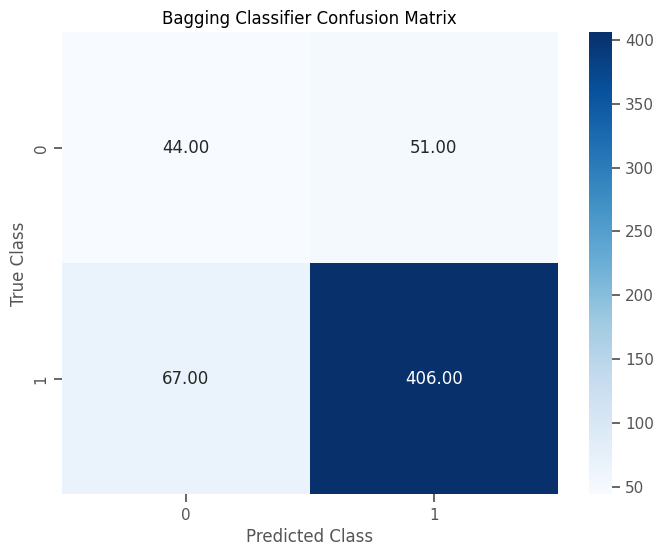

---------------------------------------------------------------------------------


Evaluating Passive Aggressive Classifier...
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.42      0.39        95
           1       0.88      0.85      0.87       473

    accuracy                           0.78       568
   macro avg       0.62      0.64      0.63       568
weighted avg       0.79      0.78      0.79       568



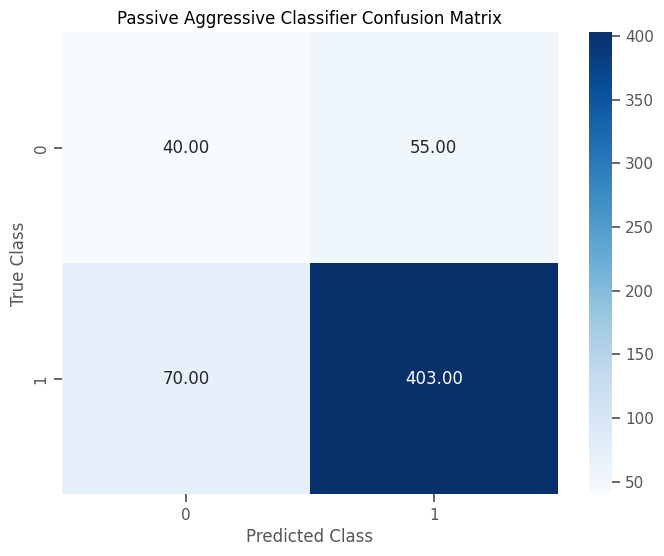

---------------------------------------------------------------------------------


Evaluating Perceptron...
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.32      0.39        95
           1       0.87      0.94      0.90       473

    accuracy                           0.83       568
   macro avg       0.69      0.63      0.65       568
weighted avg       0.81      0.83      0.82       568



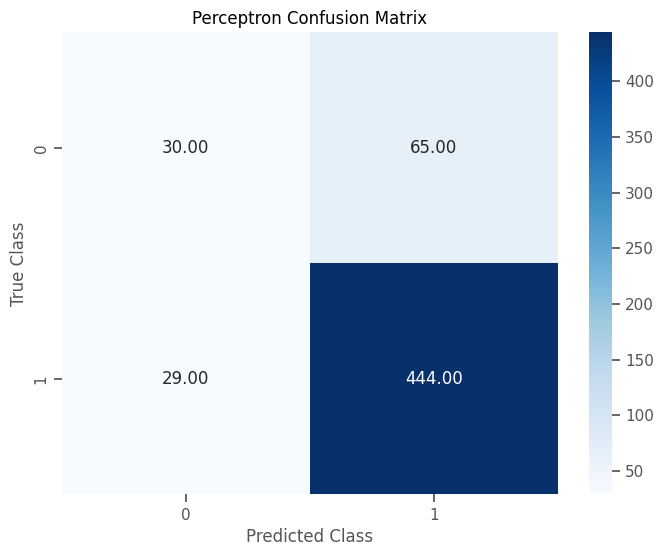

---------------------------------------------------------------------------------


Evaluating XGBoost Classifier...
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.40      0.45        95
           1       0.88      0.93      0.90       473

    accuracy                           0.84       568
   macro avg       0.70      0.66      0.68       568
weighted avg       0.82      0.84      0.83       568



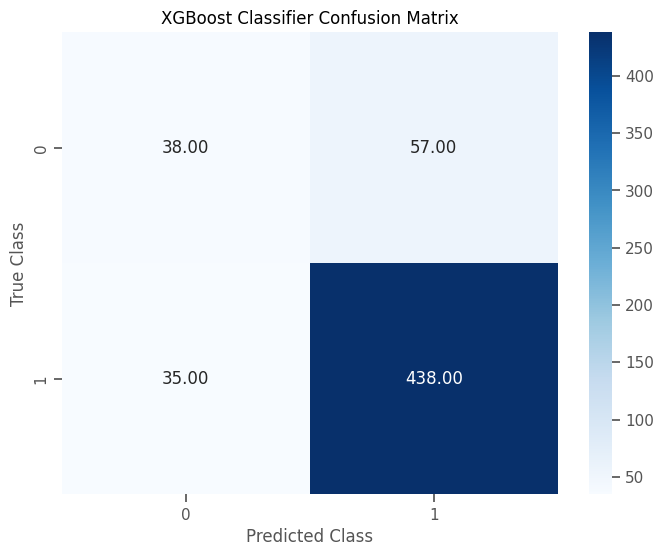

---------------------------------------------------------------------------------


Evaluating LightGBM Classifier...
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.35      0.38        95
           1       0.87      0.90      0.89       473

    accuracy                           0.81       568
   macro avg       0.65      0.63      0.63       568
weighted avg       0.80      0.81      0.80       568



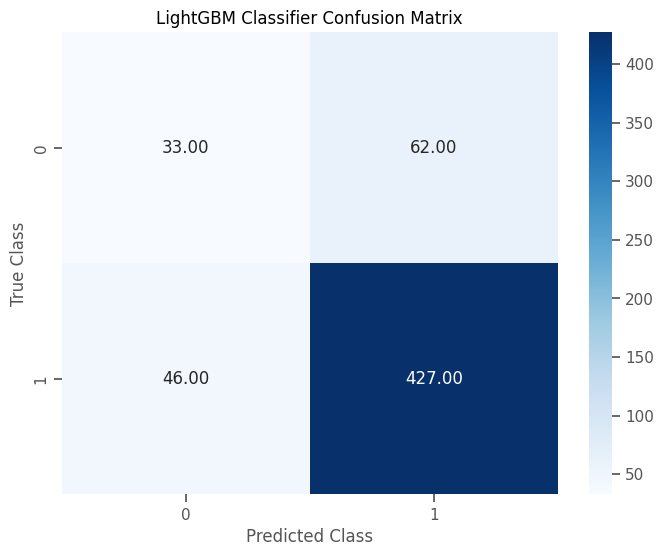

---------------------------------------------------------------------------------




In [308]:
evaluate_classification_algorithms(X_train_smoteenn, X_test, y_train_smoteenn.ravel(), y_test)


# Experiment III : **Neural Network with SMOTE+ENN**

In [309]:
# Model and performance
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.utils import class_weight

Epoch 1/100
374/374 [==============================] - 2s 3ms/step - loss: 8.1446
Epoch 2/100
374/374 [==============================] - 1s 2ms/step - loss: 2.7543
Epoch 3/100
374/374 [==============================] - 1s 2ms/step - loss: 2.2940
Epoch 4/100
374/374 [==============================] - 2s 5ms/step - loss: 1.8931
Epoch 5/100
374/374 [==============================] - 1s 2ms/step - loss: 1.5700
Epoch 6/100
374/374 [==============================] - 1s 2ms/step - loss: 1.3951
Epoch 7/100
374/374 [==============================] - 1s 2ms/step - loss: 1.2160
Epoch 8/100
374/374 [==============================] - 1s 2ms/step - loss: 1.0350
Epoch 9/100
374/374 [==============================] - 1s 2ms/step - loss: 0.9287
Epoch 10/100
374/374 [==============================] - 1s 2ms/step - loss: 0.8713
Epoch 11/100
374/374 [==============================] - 1s 3ms/step - loss: 0.7459
Epoch 12/100
374/374 [==============================] - 1s 4ms/step - loss: 0.7679
Epoch 13/100


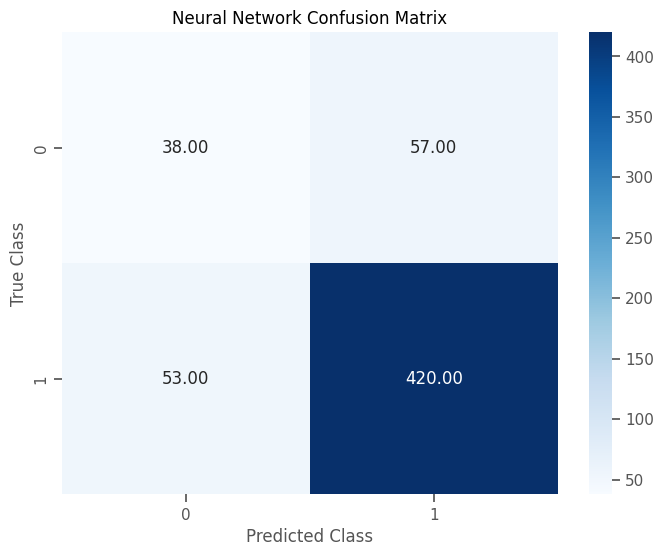

In [310]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report

# Define the manual weights
# manual_weights = {0: 200, 1: 1} play around with the weights. 0 is our minority class
manual_weights = {0: 1, 1: 205}


# Create the neural network model
nn_model_mbalanced = Sequential()
nn_model_mbalanced.add(Dense(16, input_dim=1012, activation='relu'))  # Adjust the input_dim based on the number of features in your data
nn_model_mbalanced.add(Dense(8, activation='relu'))  # You can adjust the number of layers and units based on your data and requirements
nn_model_mbalanced.add(Dense(1, activation='sigmoid'))

# Compile the model
nn_model_mbalanced.compile(loss='binary_crossentropy', optimizer='adam')

# Fit the model
nn_model_mbalanced.fit(X_train_smoteenn, y_train_smoteenn, epochs=100, batch_size=10, class_weight=manual_weights)

# Prediction 
nn_model_mbalanced_prediction = nn_model_mbalanced.predict(X_test)
nn_model_mbalanced_classes = [1 if i > 0.5 else 0 for i in nn_model_mbalanced_prediction] # approximating probabilities you cann apply a threshold for this maybe "0.something"

# Check the model performance
print(classification_report(y_test, nn_model_mbalanced_classes))

# Generate confusion matrix
confusion_matrix_result = confusion_matrix(y_test, nn_model_mbalanced_classes)
        
# Generate heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, fmt='.2f', annot=True, cmap='Blues')
plt.title("Neural Network Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


#**Experiment IV: Logistic Regression Balanced Weights**

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.36      0.41        95
           1       0.88      0.92      0.90       473

    accuracy                           0.83       568
   macro avg       0.68      0.64      0.66       568
weighted avg       0.81      0.83      0.82       568

Confusion Matrix:
[[ 34  61]
 [ 36 437]]


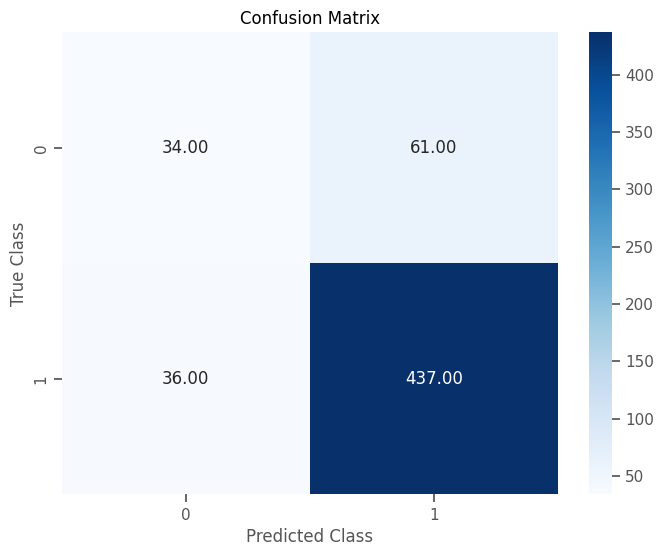

In [311]:
lr = LogisticRegression(solver='newton-cg', class_weight='balanced')
lr.fit(X_train_smoteenn, y_train_smoteenn)

# Predicting on the test data
pred_test = lr.predict(X_test)

#Calculating and printing the f1 score 
class_report_result = classification_report(y_test, pred_test)
print("Classification Report:")
print(class_report_result)


# Generate confusion matrix
confusion_matrix_result = confusion_matrix(y_test, pred_test)
print("Confusion Matrix:")
print(confusion_matrix_result)
        
# Generate heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result,fmt='.2f', annot=True, cmap='Blues')
plt.title(f"Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

